In [1]:
import gym
import linearstochlearnerdynamics
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# THESE WERE VERIFIED
def getOptWeights(m, rewards, pos_weights, alpha):
    policyvals = dict()
    
    for i, j, k in pos_weights:
        
        a = np.array([
            [alpha*m[0][i][0]-1, alpha*m[0][i][1], alpha*m[0][i][2]],
            [alpha*m[1][j][0], alpha*m[1][j][1]-1, alpha*m[1][j][2]],
            [alpha*m[2][k][0], alpha*m[2][k][1], alpha*m[2][k][2]-1]
        ])
        
        b = np.array([
            -(m[0][i][0]*rewards[0][0]+m[0][i][1]*rewards[0][1]+m[0][i][2]*rewards[0][2]),
            -(m[1][j][0]*rewards[1][0]+m[1][j][1]*rewards[1][1]+m[1][j][2]*rewards[1][2]),
            -(m[2][k][0]*rewards[2][0]+m[2][k][1]*rewards[2][1]+m[2][k][2]*rewards[2][2])
        ])
        
        v = np.linalg.solve(a, b)
        policyvals[(i,j,k)] = v
            
    return policyvals

def getStatProb(policy, trans_matrix):
    a = np.array([
        [trans_matrix[0][policy[0]][0]-1, trans_matrix[1][policy[1]][0], trans_matrix[2][policy[2]][0]],
        [trans_matrix[0][policy[0]][1], trans_matrix[1][policy[1]][1]-1, trans_matrix[2][policy[2]][1]],
        [1,1,1]
    ])
    b = np.array([0, 0, 1])
    return np.linalg.solve(a, b)

### Toy Problem 3: TD Learner
Under the optimal policy, this should converge to $w_1^* =5.14404, w_2^*=5.17404$, attaining a min value of 3.78382.  This new policy chooses action $a_1$ in states A and B, and action $a_2$ in state C.

[2017-12-04 13:34:26,211] Making new env: ToyProblem3-Random-v0


[ 0.66599589 -0.31375699]


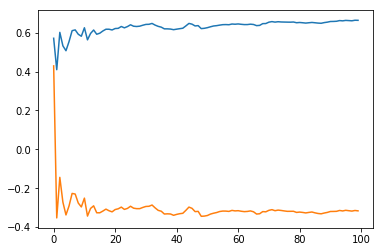

[ 0.66552267 -0.3153672 ]
0.0339875108917


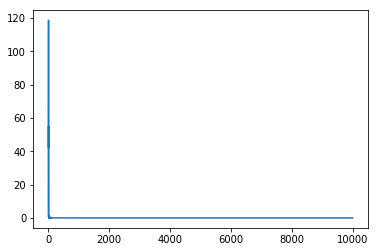

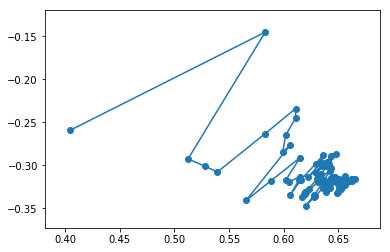

In [3]:
feat0 = np.array([[ 1.04018685,  1.98082556],
                  [ 1.00608013,  0.29379829],
                  [ 1.18982   ,  1.24834926]])
a = 0.46510069895066719
lst=[]
minobjective = []

b0=linearstochlearnerdynamics.linearStochLearner(feat0, 'TD', 'ToyProblem3-Random-v0', alpha = a, w_start=-5)
b0.w = np.array([ 0.57169057,  0.42958879])
b0.env.unwrapped.rewards = np.array([[-0.67535523, -0.79513353,  0.13133286],
                                          [ 0.46995105,  0.22498957, -0.07092068],
                                          [ 0.02603639,  0.63987841,  0.68378088]])
b0.env.unwrapped.trans_matrix = np.array([[[ 0.42648717,  0.00761253,  0.56590031],
                                      [ 0.43644917,  0.31321313,  0.25033769]],
                                     
                                     [[ 0.2596199 ,  0.49111796,  0.24926214],
                                      [ 0.35342755,  0.45578122,  0.19079123]],
                                     
                                     [[ 0.36024236,  0.4911031 ,  0.14865454],
                                      [ 0.32843078,  0.26243813,  0.40913109]]])
policy = (b0.getAction(0), b0.getAction(1), b0.getAction(2))
print(b0.policyIterate(num_iter=1, num_ep=100))
plt.plot(b0.weights[::100])
plt.show()

statdist = getStatProb(policy, b0.env.unwrapped.trans_matrix)
optval = getOptWeights(b0.env.unwrapped.trans_matrix, b0.env.unwrapped.rewards, [policy], a)[policy]
for w in b0.weights:
    s = 0
    for i in range(3):
        s += statdist[i] * (sum(feat0[i]*w) - optval[i]) ** 2
    minobjective.append(s)
print(b0.weights[minobjective.index(min(minobjective))])
print(min(minobjective))
plt.plot(minobjective)
plt.show()

# Show progression in 2D
x = []
y = []
for i in b0.weights:
    x.append(i[0])
    y.append(i[1])
plt.scatter(x[50::100], y[50::100])
plt.plot(x[50::100], y[50::100])
plt.show()

### Toy Problem 3: STD Learner (2017)
Under the optimal policy, this should converge to $w_1^* = -5.40375, w_2^*=-5.37375$, acheiving a minimum of 0.

[2017-12-04 13:35:29,852] Making new env: ToyProblem3-Random-v0


[ 1.21309549 -0.30763393]


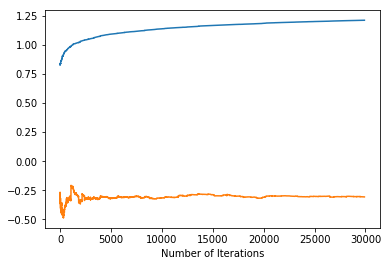

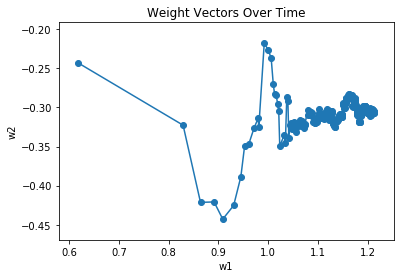

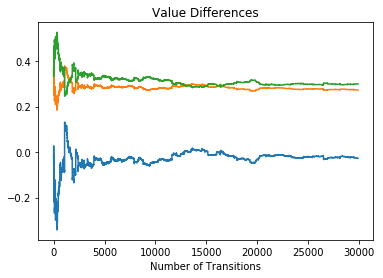

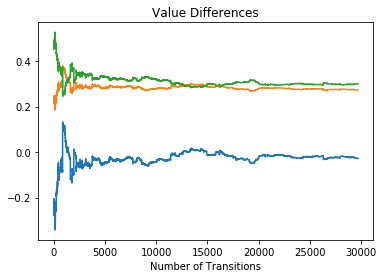

In [5]:
feat0 = np.array([[ 1.04018685,  1.98082556],
                  [ 1.00608013,  0.29379829],
                  [ 1.18982   ,  1.24834926]])
a = 0.46510069895066719

b0=linearstochlearnerdynamics.linearStochLearner(feat0, 'STD-NEW', 'ToyProblem3-Random-v0', alpha = a, w_start=-10)
b0.w = np.array([ 0.57169057,  0.42958879])
b0.env.unwrapped.rewards = np.array([[-0.67535523, -0.79513353,  0.13133286],
                                          [ 0.46995105,  0.22498957, -0.07092068],
                                          [ 0.02603639,  0.63987841,  0.68378088]])
b0.env.unwrapped.trans_matrix = np.array([[[ 0.42648717,  0.00761253,  0.56590031],
                                      [ 0.43644917,  0.31321313,  0.25033769]],
                                     
                                     [[ 0.2596199 ,  0.49111796,  0.24926214],
                                      [ 0.35342755,  0.45578122,  0.19079123]],
                                     
                                     [[ 0.36024236,  0.4911031 ,  0.14865454],
                                      [ 0.32843078,  0.26243813,  0.40913109]]])
policy = (b0.getAction(0),b0.getAction(1),b0.getAction(2))
print(b0.policyIterate(num_iter=1, num_ep=300))
plt.plot(b0.weights[100:])
plt.xlabel("Number of Iterations")
plt.show()

# Show progression in 2D
x = []
y = []
for i in b0.weights:
    x.append(i[0])
    y.append(i[1])
plt.scatter(x[5::100], y[5::100])
plt.plot(x[5::100], y[5::100])
plt.title("Weight Vectors Over Time")
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

## Plot loss
all_weights = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            all_weights.append((i,j,k))

statprob = getStatProb(policy, b0.env.unwrapped.trans_matrix)
policyvals = getOptWeights(b0.env.unwrapped.trans_matrix, b0.env.unwrapped.rewards, all_weights, a)
stdAB = (b0.weights@np.transpose(feat0)-policyvals[tuple(policy)])@np.transpose(np.array([1,-1,0]))
stdAC = (b0.weights@np.transpose(feat0)-policyvals[tuple(policy)])@np.transpose(np.array([1,0,-1]))
stdBC = (b0.weights@np.transpose(feat0)-policyvals[tuple(policy)])@np.transpose(np.array([0,1,-1]))

plt.plot(stdAB[100:])
plt.plot(stdAC[100:])
plt.plot(stdBC[100:])
plt.xlabel("Number of Transitions")
plt.title("Value Differences")
plt.show()


plt.plot(stdAB[300:])
plt.plot(stdAC[300:])
plt.plot(stdBC[300:])
plt.xlabel("Number of Transitions")
plt.title("Value Differences")
plt.show()

In [6]:
print(b0.getAction(0),b0.getAction(1),b0.getAction(2))

0 1 1


In [7]:
stdAB[-1], stdAC[-1]

(-0.02751879685881653, 0.27292373200321418)

In [8]:
policy

(0, 1, 1)

In [9]:
b0.env.unwrapped.rewards

array([[-0.67535523, -0.79513353,  0.13133286],
       [ 0.46995105,  0.22498957, -0.07092068],
       [ 0.02603639,  0.63987841,  0.68378088]])

In [10]:
b0.env.unwrapped.trans_matrix

array([[[ 0.42648717,  0.00761253,  0.56590031],
        [ 0.43644917,  0.31321313,  0.25033769]],

       [[ 0.2596199 ,  0.49111796,  0.24926214],
        [ 0.35342755,  0.45578122,  0.19079123]],

       [[ 0.36024236,  0.4911031 ,  0.14865454],
        [ 0.32843078,  0.26243813,  0.40913109]]])

In [11]:
policyvals[policy]

array([-0.07337928,  0.37671404,  0.60639832])

In [12]:
b0.w@np.transpose(feat0)

array([ 0.65247683,  1.13008895,  1.05933069])

In [13]:
policyvals

{(0, 0, 0): array([-0.10113177,  0.34108265,  0.52235078]),
 (0, 0, 1): array([-0.07448857,  0.35741194,  0.60327935]),
 (0, 1, 0): array([-0.09919787,  0.3624947 ,  0.52795291]),
 (0, 1, 1): array([-0.07337928,  0.37671404,  0.60639832]),
 (1, 0, 0): array([-0.53166355,  0.25903769,  0.42472581]),
 (1, 0, 1): array([-0.51692895,  0.27373534,  0.50719857]),
 (1, 1, 0): array([-0.5312684 ,  0.26079758,  0.42522877]),
 (1, 1, 1): array([-0.51709031,  0.27296917,  0.50705263])}

In [14]:
-0.07337928-0.37671404,0.81482226-1.29662976

(-0.45009331999999996, -0.48180750000000006)

In [ ]:
-0.07337928-0.60639832,0.81482226-1.25100021

In [15]:
b0.w

array([ 1.21309549, -0.30763393])